# LAB 5 - Map of active volcanoes

Here is an example of plotting a map of active volcanoes using data online at Oregon State University.

<!-- This form breaks the book 
<div>
<img src="Images/volcano_map.png" width="50%"/>
</div>
-->

![volcano_map](Images/volcano_map.png)


At the end of this script you will produce a map just like the one shown here.


## Resources you will use. 

This notebook makes use of a couple of packages that might come in handy another time. The maps 
are made by `cartopy` which is a mapping tool written by the Meteorological Office in the UK (and 
which happens to be really good a plotting satellite data). The `pandas` package is a database 
tool that is really very good at manipulating tables of different types of data, selecting, sorting,
refining and so on.


In [1]:
%matplotlib inline

import json

from lxml import html

import cartopy.crs as ccrs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

chartinfo = 'Author: Meghan Miller | Data: Volcano World - volcano.oregonstate.edu'

This next section reads the data from the Oregon State University database at:  http://volcano.oregonstate.edu/oldroot/volcanoes/alpha.html

In [2]:
pdurl = 'http://volcano.oregonstate.edu/oldroot/volcanoes/alpha.html'
xpath = '//table'
tree = html.parse(pdurl)
tables = tree.xpath(xpath)

table_dfs = []
for idx in range(4, len(tables)):
    df = pd.read_html(html.tostring(tables[idx]), header=0)[0]
    table_dfs.append(df)

In [3]:
df_volc = pd.concat(table_dfs, ignore_index=True)

Clean up the data to make sure the typos and missing information are not propogated into your database

In [4]:
def cleanup_type(s):
    if not isinstance(s, str):
        return s
    s = s.replace('?', '').replace('  ', ' ')
    s = s.replace('volcanoes', 'volcano')
    s = s.replace('volcanoe', 'Volcano')
    s = s.replace('cones', 'cone')
    s = s.replace('Calderas', 'Caldera')
    return s.strip().title()

df_volc['Type'] = df_volc['Type'].map(cleanup_type)
df_volc['Type'].value_counts()

Stratovolcano         713
Shield Volcano        173
Submarine Volcano     137
Volcanic Field         98
Caldera                87
Cinder Cone            84
Complex Volcano        56
Pyroclastic Cone       43
Lava Domes             31
Fissure Vents          18
Tuff Cone              14
Maars                  12
Compound Volcano       11
Lava Dome              10
Pyroclastic Shield      8
Scoria Cone             8
Maar                    7
Somma Volcano           6
Unknown                 6
Subglacial Volcano      6
Lava Cone               5
Crater Rows             5
Fumarole Field          3
Pumice Cone             3
Explosion Craters       2
Fissure Vent            2
Volcanic Complex        2
Flood Basalt            1
Tuff Rings              1
Cone                    1
Island Arc              1
Cones                   1
Hydrothermal Field      1
Flood Basalts           1
Volcanic Landform       1
Lava Field              1
Name: Type, dtype: int64

Now determine the number of volcanoes in the database.

In [5]:
df_volc.dropna(inplace=True)
len(df_volc)

1513

Now select the volcanoes that are above sealevel

In [6]:
df_volc = df_volc[df_volc['Elevation (m)'] >= 0]
len(df_volc)

1406

Make a nice table of the first 10 volancoes from the information that you grabbed out of the Oregon State University website on volcanoes

In [7]:
print(len(df_volc))
df_volc.head(10)

1406


,Name,Location,Type,Latitude,Longitude,Elevation (m)
0,Abu,Honshu-Japan,Shield Volcano,34.50,131.60,641.0
1,Acamarachi,Chile-N,Stratovolcano,-23.30,-67.62,6046.0
2,Acatenango,Guatemala,Stratovolcano,14.50,-90.88,3976.0
3,Acigöl-Nevsehir,Turkey,Caldera,38.57,34.52,1689.0
4,Adams,US-Washington,Stratovolcano,46.21,-121.49,3742.0
6,Adatara,Honshu-Japan,Stratovolcano,37.64,140.29,1718.0
7,Adwa,Ethiopia,Stratovolcano,10.07,40.84,1733.0
8,Afderà,Ethiopia,Stratovolcano,13.08,40.85,1295.0
9,Agrigan,Mariana Is-C Pacific,Stratovolcano,18.77,145.67,965.0
10,Agua,Guatemala,Stratovolcano,14.47,-90.74,3760.0


Determine the number of each type of volcanoes from this list and output this information to the screen.

In [8]:
df_volc['Type'].value_counts()

Stratovolcano         713
Shield Volcano        172
Volcanic Field         87
Caldera                86
Cinder Cone            81
Complex Volcano        56
Pyroclastic Cone       38
Lava Domes             31
Fissure Vents          18
Submarine Volcano      16
Tuff Cone              13
Maars                  11
Compound Volcano       11
Lava Dome              10
Pyroclastic Shield      8
Scoria Cone             7
Maar                    7
Subglacial Volcano      6
Somma Volcano           6
Lava Cone               5
Crater Rows             5
Pumice Cone             3
Unknown                 3
Fumarole Field          3
Fissure Vent            2
Volcanic Complex        2
Volcanic Landform       1
Lava Field              1
Cones                   1
Hydrothermal Field      1
Explosion Craters       1
Tuff Rings              1
Name: Type, dtype: int64

In [9]:
df_volc.dropna(inplace=True)
len(df_volc)

1406

In [10]:
df = df_volc[df_volc['Type'] == 'Stratovolcano']

Create a simple scatter plot map of the stratavolcanoes

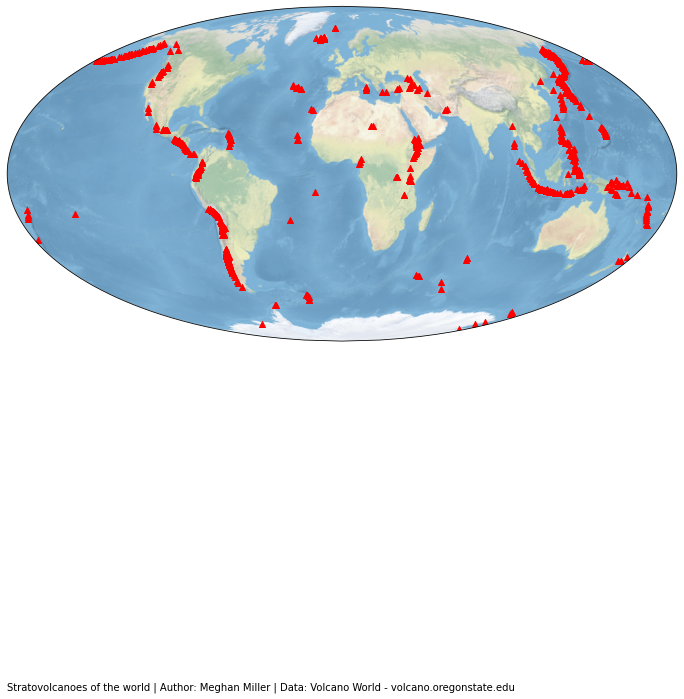

In [12]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.Mollweide())
ax.stock_img()
ax.annotate('Stratovolcanoes of the world | ' + chartinfo, xy=(0, -1.04), xycoords='axes fraction')
ax.scatter(df['Longitude'].array,df['Latitude'].array, color='red', linewidth=1, marker='^', transform=ccrs.PlateCarree())

plt.show()